In [7]:
import os

import matplotlib.pyplot as plt
import numpy as np

os.listdir()
os.getcwd()

'c:\\Users\\Daphne\\Desktop\\group-assignment\\ACRM-group-11'

In [6]:
import pandas as pd

data_path = './Data/satisfaction.csv'

satisfaction_df = pd.read_csv(data_path)

satisfaction_df.head()
satisfaction_df = satisfaction_df[["station", "Avg Satisfaction"]]
satisfaction_df.head()
satisfaction_df = satisfaction_df.sort_values(by='Avg Satisfaction')
satisfaction_df

,station,Avg Satisfaction
37,PROFONDSART,2.03
0,COURCELLES-MOTTE,3.63
16,COUILLET,5.02
202,AUBANGE,8.11
54,OBOURG,8.27
...,...,...
572,SINT-NIKLAAS,NaN
593,JURBISE,NaN
599,LAUWE,NaN
603,RUISBROEK-SAUVEGARDE,NaN


In [8]:
print(satisfaction_df.shape)
satisfaction_df = satisfaction_df.dropna()
satisfaction_df

(622, 2)


,station,Avg Satisfaction
37,PROFONDSART,2.03
0,COURCELLES-MOTTE,3.63
16,COUILLET,5.02
202,AUBANGE,8.11
54,OBOURG,8.27
...,...,...
579,SINT-GILLIS(DENDERMONDE),84.60
295,PAPIGNIES,87.06
486,GENTBRUGGE-PERRON C.W.,88.96
187,ETTERBEEK,93.98


In [9]:
satisfaction_df['Avg Satisfaction'].describe()

count    580.000000
mean      47.452431
std       16.381599
min        2.030000
25%       36.762500
50%       48.135000
75%       59.082500
max      100.000000
Name: Avg Satisfaction, dtype: float64

In [10]:
max_value = satisfaction_df['Avg Satisfaction'].max()
min_value = satisfaction_df["Avg Satisfaction"].min()

best_station = satisfaction_df[satisfaction_df["Avg Satisfaction"] == max_value]
print("Best station: ")
print(best_station)
worst_station = satisfaction_df[satisfaction_df["Avg Satisfaction"] == min_value]
print("Worst station: ")
print(worst_station)

Best station: 
               station  Avg Satisfaction
342  ANTWERPEN-BERCHEM             100.0
Worst station: 
        station  Avg Satisfaction
37  PROFONDSART              2.03


In [11]:
satisfaction_df.isnull().sum()

station             0
Avg Satisfaction    0
dtype: int64

In [12]:
satisfaction_df['station'].is_unique

True

## Stations insight:
    Do busier stations tend to have longer transfer times?

In [14]:
data_path2 = './Data/stations.csv'

stations_df = pd.read_csv(data_path2)

stations_df.drop_duplicates()

,station_id,name,alternative-fr,alternative-nl,alternative-de,alternative-en,country-code,longitude,latitude,avg_stop_times,official_transfer_time
0,8101003,Wien Hbf,NaN,NaN,NaN,NaN,at,16.375864,48.184923,0.000000,0.0
1,8734201,Arras,NaN,NaN,NaN,NaN,fr,2.781690,50.286830,0.014925,120.0
2,8015345,Aachen Hbf,Aix-la-Chapelle Hbf,Aken Hbf,NaN,NaN,de,6.105275,50.770832,30.268657,300.0
3,8895000,Aalst,Alost,NaN,NaN,NaN,be,4.039653,50.942813,157.425373,300.0
4,8895125,Aalst-Kerrebroek,Alost Kerrebroek,NaN,NaN,NaN,be,4.024407,50.948377,7.731343,300.0
...,...,...,...,...,...,...,...,...,...,...,...
670,8832334,Zonhoven,NaN,NaN,NaN,NaN,be,5.348815,50.989557,30.910448,300.0
671,8895208,Zottegem,NaN,NaN,NaN,NaN,be,3.814410,50.869102,161.223881,240.0
672,8891611,Zwankendamme,NaN,NaN,NaN,NaN,be,3.191557,51.306409,0.000000,NaN
673,8894821,Zwijndrecht,NaN,NaN,NaN,NaN,be,4.329780,51.214108,150.514925,300.0


675 stations in the stations file. De satisfaction file heeft 622 stations, waarvan 580 een satisfaction score hebben, wat dus wil zeggen dat 95 stations, stations zijn waarvan geen satisfaction data beschikbaar is.

In [15]:
stations_df = stations_df.dropna(subset=["avg_stop_times", "official_transfer_time"])
stations_df

,station_id,name,alternative-fr,alternative-nl,alternative-de,alternative-en,country-code,longitude,latitude,avg_stop_times,official_transfer_time
0,8101003,Wien Hbf,NaN,NaN,NaN,NaN,at,16.375864,48.184923,0.000000,0.0
1,8734201,Arras,NaN,NaN,NaN,NaN,fr,2.781690,50.286830,0.014925,120.0
2,8015345,Aachen Hbf,Aix-la-Chapelle Hbf,Aken Hbf,NaN,NaN,de,6.105275,50.770832,30.268657,300.0
3,8895000,Aalst,Alost,NaN,NaN,NaN,be,4.039653,50.942813,157.425373,300.0
4,8895125,Aalst-Kerrebroek,Alost Kerrebroek,NaN,NaN,NaN,be,4.024407,50.948377,7.731343,300.0
...,...,...,...,...,...,...,...,...,...,...,...
669,8832250,Zolder,NaN,NaN,NaN,NaN,be,5.329900,51.033548,30.910448,300.0
670,8832334,Zonhoven,NaN,NaN,NaN,NaN,be,5.348815,50.989557,30.910448,300.0
671,8895208,Zottegem,NaN,NaN,NaN,NaN,be,3.814410,50.869102,161.223881,240.0
673,8894821,Zwijndrecht,NaN,NaN,NaN,NaN,be,4.329780,51.214108,150.514925,300.0


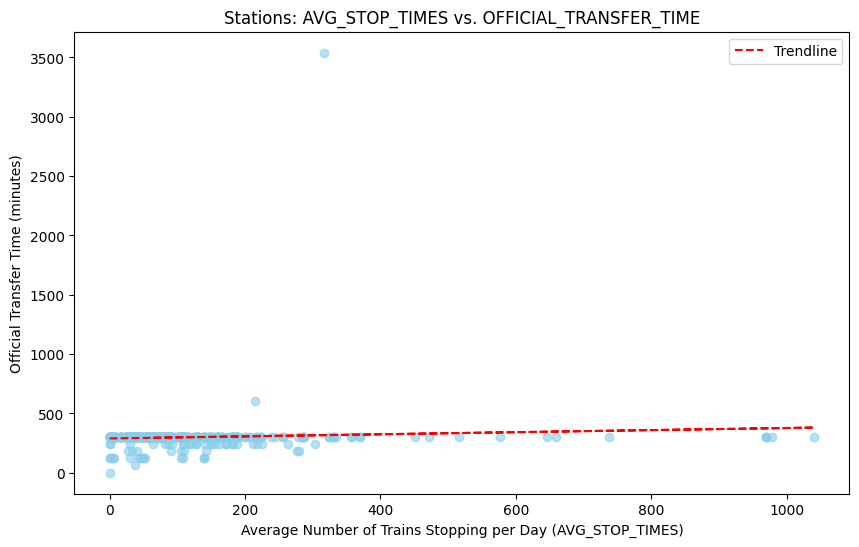

In [16]:
# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(stations_df['avg_stop_times'], stations_df['official_transfer_time'], alpha=0.6, color='skyblue')
plt.xlabel("Average Number of Trains Stopping per Day (AVG_STOP_TIMES)")
plt.ylabel("Official Transfer Time (minutes)")
plt.title("Stations: AVG_STOP_TIMES vs. OFFICIAL_TRANSFER_TIME")

# Add a simple trendline
z = np.polyfit(stations_df['avg_stop_times'], stations_df['official_transfer_time'], 1)  # linear fit
p = np.poly1d(z)
plt.plot(stations_df['avg_stop_times'], p(stations_df['avg_stop_times']), "r--", label="Trendline")
plt.legend()
plt.show()


In [17]:
corr = stations_df['avg_stop_times'].corr(stations_df['official_transfer_time'])
corr
# correlation is close to zero, meaning no linear relationship

np.float64(0.07759805133595754)

In [18]:
# define outlier: station with the highest transfer time
max_transfer = stations_df['official_transfer_time'].max()

station_max_transfer = stations_df[stations_df['official_transfer_time'] == max_transfer]
station_max_transfer

,station_id,name,alternative-fr,alternative-nl,alternative-de,alternative-en,country-code,longitude,latitude,avg_stop_times,official_transfer_time
120,8819406,Brussels Airport - Zaventem,NaN,NaN,NaN,NaN,be,4.482076,50.896456,316.970149,3540.0


Conclusion: 
    In general, busier stations do not necessarily have longer transfer times. Most stations show similar transfer times regardless of how many trains stop daily.

## Stations and Satisfaction insights:
Also important to know: 

    Short transfer times, busier stations --> easy to connect between trains
    Long tranfer times --> indicates large station or complicated layout
    given these insights, map these with the satisfaction scores, are they related? Do tranfer times and nr of trains that stop relate to passenger satisfaction?
    If so, what can be done in order to improve transfer times?

In [20]:
stations_df['official_transfer_time'].describe()

count     645.000000
mean      296.186047
std       133.294481
min         0.000000
25%       300.000000
50%       300.000000
75%       300.000000
max      3540.000000
Name: official_transfer_time, dtype: float64

In [21]:
stations_df['name_upper'] = stations_df['name'].str.upper()
satisfaction_df['station_upper'] = satisfaction_df['station'].str.upper()

stations_df
satisfaction_df

stations_satisfaction_merged = pd.merge(
    stations_df, 
    satisfaction_df,
    how='inner',
    left_on='name_upper',
    right_on='station_upper'
)

stations_satisfaction_merged

columns_to_keep = ['official_transfer_time'] + ['avg_stop_times'] + list(satisfaction_df.columns)
station_satisfaction_filtered = stations_satisfaction_merged[columns_to_keep]

station_satisfaction_filtered


C:\Users\Daphne\AppData\Local\Temp\ipykernel_37648\871446963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satisfaction_df['station_upper'] = satisfaction_df['station'].str.upper()


,official_transfer_time,avg_stop_times,station,Avg Satisfaction,station_upper
0,300.0,157.425373,AALST,60.77,AALST
1,300.0,7.731343,AALST-KERREBROEK,49.97,AALST-KERREBROEK
2,240.0,188.276119,AALTER,60.18,AALTER
3,240.0,171.664179,AARSCHOT,55.54,AARSCHOT
4,300.0,37.365672,AARSELE,27.54,AARSELE
...,...,...,...,...,...
476,300.0,37.776119,ZINGEM,51.33,ZINGEM
477,300.0,30.910448,ZOLDER,57.43,ZOLDER
478,300.0,30.910448,ZONHOVEN,39.39,ZONHOVEN
479,240.0,161.223881,ZOTTEGEM,48.90,ZOTTEGEM


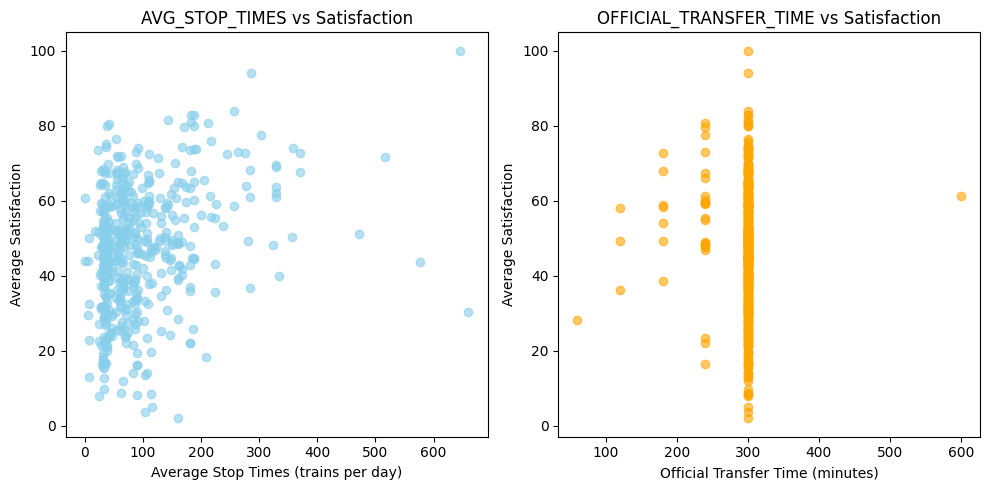

In [22]:


# 1. AVG_STOP_TIMES vs Satisfaction
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(station_satisfaction_filtered['avg_stop_times'], station_satisfaction_filtered['Avg Satisfaction'], alpha=0.6, color='skyblue')
plt.xlabel("Average Stop Times (trains per day)")
plt.ylabel("Average Satisfaction")
plt.title("AVG_STOP_TIMES vs Satisfaction")

# 2. OFFICIAL_TRANSFER_TIME vs Satisfaction
plt.subplot(1,2,2)
plt.scatter(station_satisfaction_filtered['official_transfer_time'], station_satisfaction_filtered['Avg Satisfaction'], alpha=0.6, color='orange')
plt.xlabel("Official Transfer Time (minutes)")
plt.ylabel("Average Satisfaction")
plt.title("OFFICIAL_TRANSFER_TIME vs Satisfaction")

plt.tight_layout()
plt.show()

In [23]:
# AVG_STOP_TIMES vs Satisfaction
corr_stop_times = station_satisfaction_filtered['avg_stop_times'].corr(station_satisfaction_filtered['Avg Satisfaction'])
print("Correlation between AVG_STOP_TIMES and Satisfaction:", corr_stop_times)

# OFFICIAL_TRANSFER_TIME vs Satisfaction
corr_transfer_time = station_satisfaction_filtered['official_transfer_time'].corr(station_satisfaction_filtered['Avg Satisfaction'])
print("Correlation between OFFICIAL_TRANSFER_TIME and Satisfaction:", corr_transfer_time)

Correlation between AVG_STOP_TIMES and Satisfaction: 0.29549926219854294
Correlation between OFFICIAL_TRANSFER_TIME and Satisfaction: -0.04792317045911702


Conclusion: 

Correlation between avg_stop_times and satisfaction scores is moderately positive. Stations with more trains stopping per day tend to have higher passenger satisfaction. (makes sense as busier station often offer better service frequency, connectivity)
A correlation between transfer times and satisfaction is close to zero so not significant. (logisch wel dat het negatief is: hoe langer de transfer times, hoe lower de satisfaction)

For improving passenger experience, NMBS/SNCB could focus on increasing train availability and service reliability at stations rather than only reducing transfer times, except for specific outlier stations with exceptionally long transfers.

### Nr of travelers per week (frequency)

In [62]:
travelers_df

,Station,Avg week,Avg saturday,Avg sunday,Avg weekend,weekend_ratio
0,AALST,6444.0,1768.0,1592.0,1680.0,0.260708
1,AALST-KERREBROEK,27.0,NaN,NaN,NaN,NaN
2,AALTER,2288.0,1055.0,855.0,955.0,0.417395
3,AARSCHOT,6270.0,1954.0,1395.0,1674.5,0.267065
4,AARSELE,34.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
548,ZINGEM,523.0,98.0,86.0,92.0,0.175908
549,ZOLDER,123.0,38.0,37.0,37.5,0.304878
550,ZONHOVEN,67.0,29.0,19.0,24.0,0.358209
551,ZOTTEGEM,4936.0,986.0,931.0,958.5,0.194186


## Q1: Use the traveler satisfaction survey results. Which factors (facilities, delays, frequency, etc.) statistically explain differences in satisfaction scores?


In [28]:

trips = pd.read_csv("./Data/Trips/Trips_22_09_2025.csv", sep=';')
trips.head()

,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date
0,2025-09-22,3605,IC 29,SNCB/NMBS,36,06:28:04,06:28:04,06:25:00,06:25:00,184.0,184.0,IC 29: GENT-SINT-PIETERS -> GENK,SCHAARBEEK,36,2025-09-22,2025-09-22,2025-09-22,2025-09-22
1,2025-09-22,3605,IC 29,SNCB/NMBS,36N,06:34:58,06:34:58,06:32:00,06:32:00,178.0,178.0,IC 29: GENT-SINT-PIETERS -> GENK,KORTENBERG,36N,2025-09-22,2025-09-22,2025-09-22,2025-09-22
2,2025-09-22,3605,IC 29,SNCB/NMBS,36,06:41:40,06:43:28,06:39:00,06:42:00,160.0,88.0,IC 29: GENT-SINT-PIETERS -> GENK,LEUVEN,36N,2025-09-22,2025-09-22,2025-09-22,2025-09-22
3,2025-09-22,3605,IC 29,SNCB/NMBS,36,06:50:53,06:50:53,06:49:00,06:49:00,113.0,113.0,IC 29: GENT-SINT-PIETERS -> GENK,VERTRIJK,36,2025-09-22,2025-09-22,2025-09-22,2025-09-22
4,2025-09-22,3605,IC 29,SNCB/NMBS,36,07:02:49,07:02:49,07:00:00,07:00:00,169.0,169.0,IC 29: GENT-SINT-PIETERS -> GENK,EZEMAAL,36,2025-09-22,2025-09-22,2025-09-22,2025-09-22


In [29]:
trips['Delay at departure'] = pd.to_numeric(trips['Delay at departure'], errors='coerce')
trips['Delay at arrival'] = pd.to_numeric(trips['Delay at arrival'], errors='coerce')

station_delay = trips.groupby('Stopping place')[['Delay at departure', 'Delay at arrival']].mean().reset_index()
station_delay.columns = ['Station', 'avg_departure_delay', 'avg_arrival_delay']

station_delay

,Station,avg_departure_delay,avg_arrival_delay
0,AALST,98.931624,96.406780
1,AALST-KERREBROEK,62.200000,73.900000
2,AALTER,57.062500,26.458333
3,AARSCHOT,100.521053,111.363158
4,AARSELE,286.977273,284.340909
...,...,...,...
601,ZOLDER,145.823529,140.117647
602,ZOLDER-KRUISSPOREN,141.647059,141.647059
603,ZONHOVEN,139.882353,148.588235
604,ZOTTEGEM,142.738854,253.778481


In [30]:
print("Skewness of average departure delay:", station_delay['avg_departure_delay'].skew())
print("Skewness of average arrival delay:", station_delay['avg_arrival_delay'].skew())

Skewness of average departure delay: 2.109398145901989
Skewness of average arrival delay: 2.011507566443961


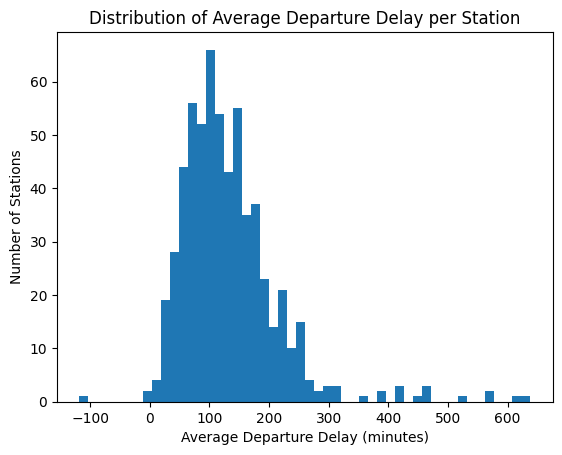

In [31]:
import matplotlib.pyplot as plt

plt.hist(station_delay['avg_departure_delay'], bins=50)
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Number of Stations')
plt.title('Distribution of Average Departure Delay per Station')
plt.show()


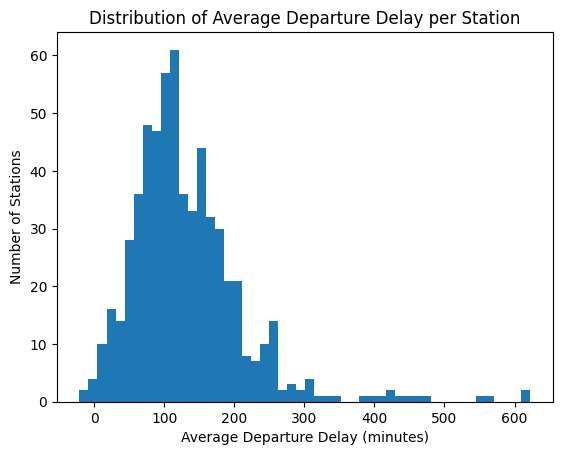

In [32]:
import matplotlib.pyplot as plt

plt.hist(station_delay['avg_arrival_delay'], bins=50)
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Number of Stations')
plt.title('Distribution of Average Departure Delay per Station')
plt.show()

In [33]:
# Top 10 stations with the largest average delays
top_delay_stations = station_delay.sort_values('avg_departure_delay', ascending=False).head(10)
print(top_delay_stations[['Station', 'avg_departure_delay', 'avg_arrival_delay']])

            Station  avg_departure_delay  avg_arrival_delay
280          IZEGEM           638.257143         616.357143
281      IZEGEM-SAS           622.528571         622.528571
256      HERGENRATH           573.968254         570.190476
279    INGELMUNSTER           564.128571         549.657143
477       ROESELARE           518.816901         397.642857
18    ANTWERPEN-DAM           469.500000         469.500000
21   ANTWERPEN-OOST           467.000000         467.000000
543         TORHOUT           461.934211         433.855263
594        ZEDELGEM           450.947368         447.776316
267       HOEILAART           425.227778         428.766667


In [34]:
satisfaction_df['station'].str.upper()

satisfaction_df

,station,Avg Satisfaction,station_upper
37,PROFONDSART,2.03,PROFONDSART
0,COURCELLES-MOTTE,3.63,COURCELLES-MOTTE
16,COUILLET,5.02,COUILLET
202,AUBANGE,8.11,AUBANGE
54,OBOURG,8.27,OBOURG
...,...,...,...
579,SINT-GILLIS(DENDERMONDE),84.60,SINT-GILLIS(DENDERMONDE)
295,PAPIGNIES,87.06,PAPIGNIES
486,GENTBRUGGE-PERRON C.W.,88.96,GENTBRUGGE-PERRON C.W.
187,ETTERBEEK,93.98,ETTERBEEK


In [35]:
satisfaction_trips_df = pd.merge(satisfaction_df, station_delay, how = 'inner', left_on='station', right_on='Station')

satisfaction_trips_df.dropna(subset=['Avg Satisfaction'], inplace=True)

satisfaction_trips_df

,station,Avg Satisfaction,station_upper,Station,avg_departure_delay,avg_arrival_delay
0,PROFONDSART,2.03,PROFONDSART,PROFONDSART,305.016667,307.761111
1,COURCELLES-MOTTE,3.63,COURCELLES-MOTTE,COURCELLES-MOTTE,133.783784,144.288288
2,COUILLET,5.02,COUILLET,COUILLET,109.648649,107.351351
3,AUBANGE,8.11,AUBANGE,AUBANGE,85.542857,89.857143
4,OBOURG,8.27,OBOURG,OBOURG,48.656863,53.627451
...,...,...,...,...,...,...
560,SINT-GILLIS(DENDERMONDE),84.60,SINT-GILLIS(DENDERMONDE),SINT-GILLIS(DENDERMONDE),96.969697,93.313131
561,PAPIGNIES,87.06,PAPIGNIES,PAPIGNIES,163.410256,164.820513
562,GENTBRUGGE-PERRON C.W.,88.96,GENTBRUGGE-PERRON C.W.,GENTBRUGGE-PERRON C.W.,71.320225,71.320225
563,ETTERBEEK,93.98,ETTERBEEK,ETTERBEEK,237.287834,232.988131


In [36]:
corr_departure = satisfaction_trips_df['Avg Satisfaction'].corr(satisfaction_trips_df['avg_departure_delay'])
corr_arrival = satisfaction_trips_df['Avg Satisfaction'].corr(satisfaction_trips_df['avg_arrival_delay'])

print("Correlation with departure delay:", corr_departure)
print("Correlation with arrival delay:", corr_arrival)

Correlation with departure delay: 0.018080281554883903
Correlation with arrival delay: 0.03812316231103642


In [37]:
import statsmodels.api as sm

X = satisfaction_trips_df[['avg_departure_delay', 'avg_arrival_delay']]
Y = satisfaction_trips_df['Avg Satisfaction']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Avg Satisfaction   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.243
Date:                Wed, 15 Oct 2025   Prob (F-statistic):              0.289
Time:                        01:26:47   Log-Likelihood:                -2384.4
No. Observations:                 565   AIC:                             4775.
Df Residuals:                     562   BIC:                             4788.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  46.6490    

In [38]:
import statsmodels.api as sm

# run multivariate regression
X = satisfaction_trips_df[['avg_departure_delay', 'avg_arrival_delay']]
Y = satisfaction_trips_df['Avg Satisfaction']
X = sm.add_constant(X) # adding a constant: Y = beta0 + beta1*X1 + beta2*X2 + espilon instead of Y = beta1*X1 + beta2*X2 + epsilon
 
model = sm.OLS(Y, X).fit()
print_model = model.summary()

print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Avg Satisfaction   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.243
Date:                Wed, 15 Oct 2025   Prob (F-statistic):              0.289
Time:                        01:27:18   Log-Likelihood:                -2384.4
No. Observations:                 565   AIC:                             4775.
Df Residuals:                     562   BIC:                             4788.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  46.6490      1.316     35.440      0.000      44.064      49.234
avg_departure_delay    -0.0324      0.025     -1.290      0.198      -0.082       0.017
avg_arrival_delay       0.0386      0.025      1.517      0.130      -0.011       0.089
==============================================================================
Omnibus:                        0.517   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.772   Jarque-Bera (JB):                0.612
Skew:                          -0.061   Prob(JB):                        0.737
Kurtosis:                       2.895   Cond. No.                         417.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion:

    0,004 is extremely low, so definitely delays alone are not good predictors of satisfaction.
    Both aren't statistically significant as p-values are higher than 0,05

### Travelers and Satisfaction insights:

In [66]:
travelers_df

,Station,Avg week,Avg saturday,Avg sunday,Avg weekend,weekend_ratio
0,AALST,6444.0,1768.0,1592.0,1680.0,0.260708
1,AALST-KERREBROEK,27.0,NaN,NaN,NaN,NaN
2,AALTER,2288.0,1055.0,855.0,955.0,0.417395
3,AARSCHOT,6270.0,1954.0,1395.0,1674.5,0.267065
4,AARSELE,34.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
548,ZINGEM,523.0,98.0,86.0,92.0,0.175908
549,ZOLDER,123.0,38.0,37.0,37.5,0.304878
550,ZONHOVEN,67.0,29.0,19.0,24.0,0.358209
551,ZOTTEGEM,4936.0,986.0,931.0,958.5,0.194186


In [93]:
travelers_new_df = travelers_df
travelers_new_df['Nr of travelers'] = travelers_df['Avg week']*5 + travelers_df['Avg saturday'] + travelers_df['Avg sunday']
travelers_new_df['Station'] = travelers_df['Station']
travelers_new_df

,Station,Avg week,Avg saturday,Avg sunday,Avg weekend,weekend_ratio,Nr of travelers
0,AALST,6444.0,1768.0,1592.0,1680.0,0.260708,35580.0
1,AALST-KERREBROEK,27.0,NaN,NaN,NaN,NaN,NaN
2,AALTER,2288.0,1055.0,855.0,955.0,0.417395,13350.0
3,AARSCHOT,6270.0,1954.0,1395.0,1674.5,0.267065,34699.0
4,AARSELE,34.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
548,ZINGEM,523.0,98.0,86.0,92.0,0.175908,2799.0
549,ZOLDER,123.0,38.0,37.0,37.5,0.304878,690.0
550,ZONHOVEN,67.0,29.0,19.0,24.0,0.358209,383.0
551,ZOTTEGEM,4936.0,986.0,931.0,958.5,0.194186,26597.0


In [94]:
travelers_new_df.sort_values(by= 'Nr of travelers', ascending=True)
travelers_new_df

,Station,Avg week,Avg saturday,Avg sunday,Avg weekend,weekend_ratio,Nr of travelers
0,AALST,6444.0,1768.0,1592.0,1680.0,0.260708,35580.0
1,AALST-KERREBROEK,27.0,NaN,NaN,NaN,NaN,NaN
2,AALTER,2288.0,1055.0,855.0,955.0,0.417395,13350.0
3,AARSCHOT,6270.0,1954.0,1395.0,1674.5,0.267065,34699.0
4,AARSELE,34.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
548,ZINGEM,523.0,98.0,86.0,92.0,0.175908,2799.0
549,ZOLDER,123.0,38.0,37.0,37.5,0.304878,690.0
550,ZONHOVEN,67.0,29.0,19.0,24.0,0.358209,383.0
551,ZOTTEGEM,4936.0,986.0,931.0,958.5,0.194186,26597.0


In [42]:
satisfaction_df

,station,Avg Satisfaction,station_upper
37,PROFONDSART,2.03,PROFONDSART
0,COURCELLES-MOTTE,3.63,COURCELLES-MOTTE
16,COUILLET,5.02,COUILLET
202,AUBANGE,8.11,AUBANGE
54,OBOURG,8.27,OBOURG
...,...,...,...
579,SINT-GILLIS(DENDERMONDE),84.60,SINT-GILLIS(DENDERMONDE)
295,PAPIGNIES,87.06,PAPIGNIES
486,GENTBRUGGE-PERRON C.W.,88.96,GENTBRUGGE-PERRON C.W.
187,ETTERBEEK,93.98,ETTERBEEK


In [95]:
traveler_satisfaction_merge = pd.merge(travelers_new_df, satisfaction_df, how='inner', left_on='Station', right_on='station')
traveler_satisfaction_merge

,Station,Avg week,Avg saturday,Avg sunday,Avg weekend,weekend_ratio,Nr of travelers,station,Avg Satisfaction,station_upper
0,AALST,6444.0,1768.0,1592.0,1680.0,0.260708,35580.0,AALST,60.77,AALST
1,AALST-KERREBROEK,27.0,NaN,NaN,NaN,NaN,NaN,AALST-KERREBROEK,49.97,AALST-KERREBROEK
2,AALTER,2288.0,1055.0,855.0,955.0,0.417395,13350.0,AALTER,60.18,AALTER
3,AARSCHOT,6270.0,1954.0,1395.0,1674.5,0.267065,34699.0,AARSCHOT,55.54,AARSCHOT
4,AARSELE,34.0,NaN,NaN,NaN,NaN,NaN,AARSELE,27.54,AARSELE
...,...,...,...,...,...,...,...,...,...,...
491,ZINGEM,523.0,98.0,86.0,92.0,0.175908,2799.0,ZINGEM,51.33,ZINGEM
492,ZOLDER,123.0,38.0,37.0,37.5,0.304878,690.0,ZOLDER,57.43,ZOLDER
493,ZONHOVEN,67.0,29.0,19.0,24.0,0.358209,383.0,ZONHOVEN,39.39,ZONHOVEN
494,ZOTTEGEM,4936.0,986.0,931.0,958.5,0.194186,26597.0,ZOTTEGEM,48.90,ZOTTEGEM


In [96]:
traveler_satisfaction_merge = traveler_satisfaction_merge[['Station', 'Nr of travelers', 'Avg Satisfaction']]
traveler_satisfaction_merge
traveler_satisfaction_merge = traveler_satisfaction_merge.dropna(subset=['Nr of travelers', 'Avg Satisfaction'])
traveler_satisfaction_merge

,Station,Nr of travelers,Avg Satisfaction
0,AALST,35580.0,60.77
2,AALTER,13350.0,60.18
3,AARSCHOT,34699.0,55.54
5,ACREN,1223.0,32.67
6,AISEAU,532.0,19.58
...,...,...,...
491,ZINGEM,2799.0,51.33
492,ZOLDER,690.0,57.43
493,ZONHOVEN,383.0,39.39
494,ZOTTEGEM,26597.0,48.90


In [97]:
traveler_satisfaction_merge.sort_values(by='Nr of travelers', ascending=False)

,Station,Nr of travelers,Avg Satisfaction
175,GENT-SINT-PIETERS,322527.0,43.63
278,LEUVEN,198491.0,71.55
369,OTTIGNIES,135166.0,50.34
318,MECHELEN,128132.0,51.09
346,NAMUR,125215.0,40.09
...,...,...,...
382,POIX-SAINT-HUBERT,172.0,51.54
171,GENDRON-CELLES,162.0,37.23
422,STOCKEM,146.0,38.46
311,MARCHIENNE-ZONE,107.0,9.97


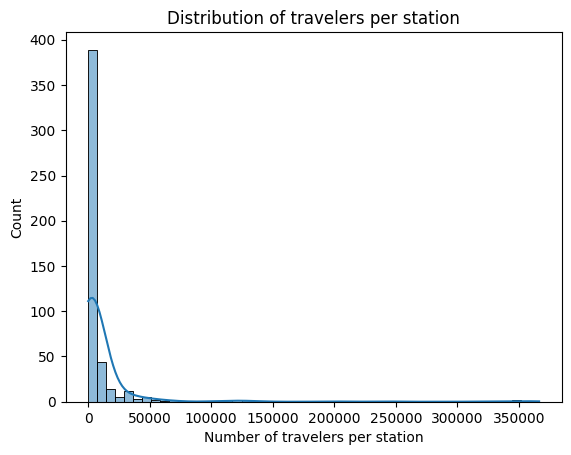

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(travelers_new_df['Nr of travelers'], bins=50, kde=True)
plt.xlabel('Number of travelers per station')
plt.title('Distribution of travelers per station')
plt.show()

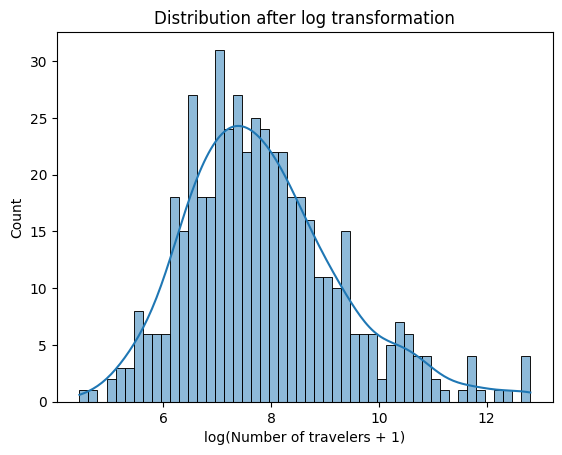

In [99]:
sns.histplot(np.log1p(travelers_new_df['Nr of travelers']), bins=50, kde=True)
plt.xlabel('log(Number of travelers + 1)')
plt.title('Distribution after log transformation')
plt.show()

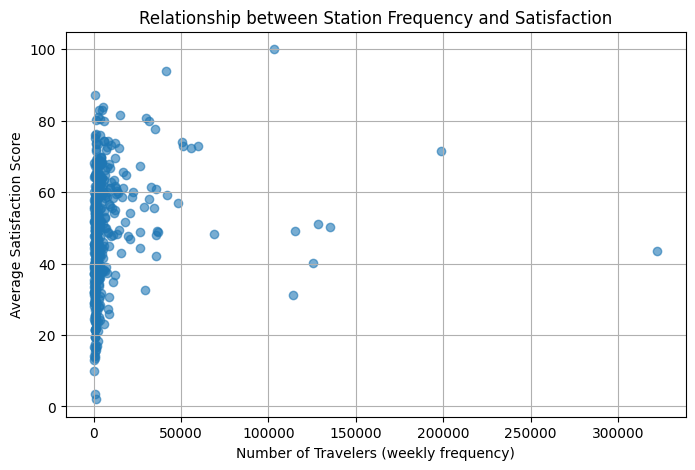

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(traveler_satisfaction_merge['Nr of travelers'], traveler_satisfaction_merge['Avg Satisfaction'], alpha=0.6)
plt.xlabel('Number of Travelers (weekly frequency)')
plt.ylabel('Average Satisfaction Score')
plt.title('Relationship between Station Frequency and Satisfaction')
plt.grid(True)
plt.show()

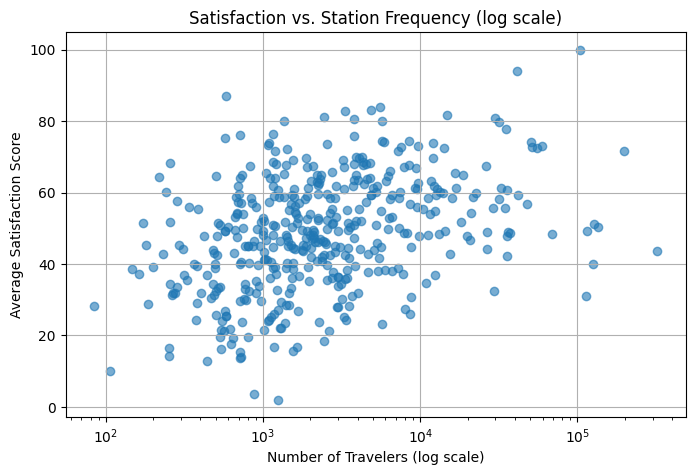

In [101]:
plt.figure(figsize=(8,5))
plt.scatter(traveler_satisfaction_merge['Nr of travelers'], traveler_satisfaction_merge['Avg Satisfaction'], alpha=0.6)
plt.xscale('log')
plt.xlabel('Number of Travelers (log scale)')
plt.ylabel('Average Satisfaction Score')
plt.title('Satisfaction vs. Station Frequency (log scale)')
plt.grid(True)
plt.show()

In [102]:
import statsmodels.api as sm

Y = traveler_satisfaction_merge['Avg Satisfaction']
X = traveler_satisfaction_merge[['Nr of travelers']]

# Add a constant (intercept)
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Avg Satisfaction   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     8.942
Date:                Wed, 15 Oct 2025   Prob (F-statistic):            0.00295
Time:                        01:46:32   Log-Likelihood:                -1832.6
No. Observations:                 438   AIC:                             3669.
Df Residuals:                     436   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              48.0532      0.802     

In [103]:
traveler_satisfaction_merge['log_travelers'] = np.log1p(traveler_satisfaction_merge['Nr of travelers'])

X = sm.add_constant(traveler_satisfaction_merge['log_travelers'])
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Avg Satisfaction   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     72.84
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           2.36e-16
Time:                        01:46:34   Log-Likelihood:                -1803.2
No. Observations:                 438   AIC:                             3610.
Df Residuals:                     436   BIC:                             3619.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.5742      4.075      3.577

In [104]:
travelers_new_df['Nr of travelers'].skew()


np.float64(7.2114734129970035)

Conclusion: as the data of traveler per station is extremely right-skewed, meaning most stations have very few travelers, but a few station like Gent Sint Pieters, and Leuven, have massively higher traffic. This is a classic long tail distribution (Q2). This means that we need to apply a log transformation before using this variable in regression models (like when predicting satisfaction).
Otherwise, those few large stations dominate the results, and relationships will appear weaker or distorted.

Result: F-statistic show the model is highly significant: meaning that station busyness really does matter statistically. Busier stations ten to have higher satisfaction.  

Log-transform: Stations with more travelers tend to have higher satisfaction scores, 
 but the relationship isn’t linear — as stations get very large, the improvement in satisfaction tapers off. 

Still the question: why? 

## Q2: Do you observe a "long tail" pattern in train travel data (e.g. stops per line, travelers per station)? What are the implications for station or route optimization?
    long tail: few items have very high values, but most items have low values. Example: a few stations are very busy, but most stations have few travelers. OR a few lines may have many stops, most lines have only a few. 

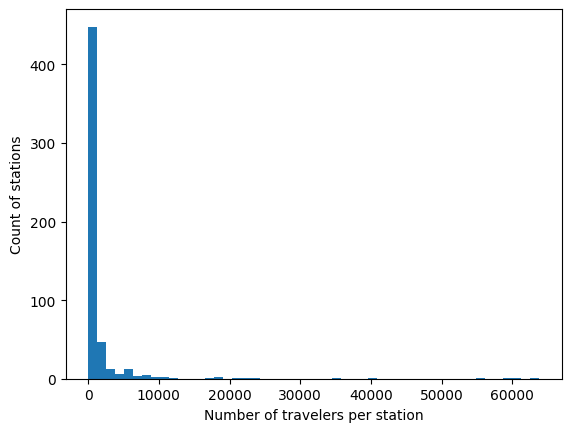

In [84]:
# Only the example of long tail in travelers dataset!!
travelers_df

import matplotlib.pyplot as plt

plt.hist(travelers_df['Avg week'], bins=50)
plt.xlabel('Number of travelers per station')
plt.ylabel('Count of stations')
plt.show()

Possible implications:

    - Head stations or lines need more resources (platforms, facilities, trains, staff)
    - tail stations don't need as much infrastructure: you can optimize costs here
    - high-demand lines: frequent service, longer trains
    - low-demand lines: fewer trains, shorter trains, skip some stops

## Q3: Some stations attract more weekend travelers than weekday ones. Which are they? Map these stations and infer possible explanations (e.g. tourism).


In [57]:
data_path3 = './Data/travelers.csv'

travelers_df = pd.read_csv(data_path3, sep=';', index_col=0)
travelers_df

,Station,Avg number of travelers in the week,Avg number of travelers on Saturday,Avg number of travelers on Sunday
0,AALST,6444.0,1768.0,1592.0
1,AALST-KERREBROEK,27.0,NaN,NaN
2,AALTER,2288.0,1055.0,855.0
3,AARSCHOT,6270.0,1954.0,1395.0
4,AARSELE,34.0,NaN,NaN
...,...,...,...,...
548,ZINGEM,523.0,98.0,86.0
549,ZOLDER,123.0,38.0,37.0
550,ZONHOVEN,67.0,29.0,19.0
551,ZOTTEGEM,4936.0,986.0,931.0


In [58]:
travelers_df['Avg number of travelers during the weekend'] = (travelers_df['Avg number of travelers on Saturday'] + travelers_df['Avg number of travelers on Sunday'])/2
travelers_df

,Station,Avg number of travelers in the week,Avg number of travelers on Saturday,Avg number of travelers on Sunday,Avg number of travelers during the weekend
0,AALST,6444.0,1768.0,1592.0,1680.0
1,AALST-KERREBROEK,27.0,NaN,NaN,NaN
2,AALTER,2288.0,1055.0,855.0,955.0
3,AARSCHOT,6270.0,1954.0,1395.0,1674.5
4,AARSELE,34.0,NaN,NaN,NaN
...,...,...,...,...,...
548,ZINGEM,523.0,98.0,86.0,92.0
549,ZOLDER,123.0,38.0,37.0,37.5
550,ZONHOVEN,67.0,29.0,19.0,24.0
551,ZOTTEGEM,4936.0,986.0,931.0,958.5


In [59]:
# Let's rename for convenience later
travelers_df = travelers_df.rename({"Avg number of travelers in the week": "Avg week",
                                    "Avg number of travelers on Saturday": "Avg saturday",
                                    "Avg number of travelers on Sunday": "Avg sunday",
                                    "Avg number of travelers during the weekend": "Avg weekend"}, axis=1)

# Show
travelers_df.head()

,Station,Avg week,Avg saturday,Avg sunday,Avg weekend
0,AALST,6444.0,1768.0,1592.0,1680.0
1,AALST-KERREBROEK,27.0,NaN,NaN,NaN
2,AALTER,2288.0,1055.0,855.0,955.0
3,AARSCHOT,6270.0,1954.0,1395.0,1674.5
4,AARSELE,34.0,NaN,NaN,NaN


In [76]:
travelers_df['weekend_ratio'] = travelers_df['Avg weekend'] / travelers_df['Avg week']

weekend_stations_df = travelers_df[travelers_df['weekend_ratio'] > 1]
week_stations_df = travelers_df[travelers_df['weekend_ratio'] < 1]



weekend = weekend_stations_df.sort_values(by= 'weekend_ratio', ascending=False)
print("List of weekend stations: ")
print(weekend)

List of weekend stations: 
               Station  Avg week  Avg saturday  Avg sunday  Avg weekend  \
57      BIERGES-WALIBI     146.0         504.0       562.0        533.0   
503    VERVIERS-PALAIS       8.0          24.0        20.0         22.0   
116                COO      35.0          50.0        66.0         58.0   
13           ANSEREMME      51.0         124.0        45.0         84.5   
417  POIX-SAINT-HUBERT      21.0          30.0        37.0         33.5   
100    CAMBRON-CASTEAU     156.0         251.0       146.0        198.5   
194               GENK     888.0         715.0      1422.0       1068.5   
272            JURBISE    1596.0        1931.0      1726.0       1828.5   
336           MARBEHAN     555.0         343.0       898.0        620.5   
280             KNOKKE     786.0         778.0       971.0        874.5   
494        TROIS-PONTS     154.0         113.0       213.0        163.0   

     weekend_ratio  
57        3.650685  
503       2.750000  
116      

### Mapping of stations with touristic attractions

In [61]:
merged_df = weekend_stations_df.merge(stations_df, left_on='Station', right_on= 'name_upper', how='inner')

max_10 = merged_df.sort_values(by='weekend_ratio', ascending = False).head(10)

max_10

import geopandas as gpd

# Create GeoDataFrame from merged top 10
gdf_max_10 = gpd.GeoDataFrame(
    max_10,
    geometry=gpd.points_from_xy(max_10.longitude, max_10.latitude),
    crs='EPSG:4326'  # WGS84
)


In [68]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

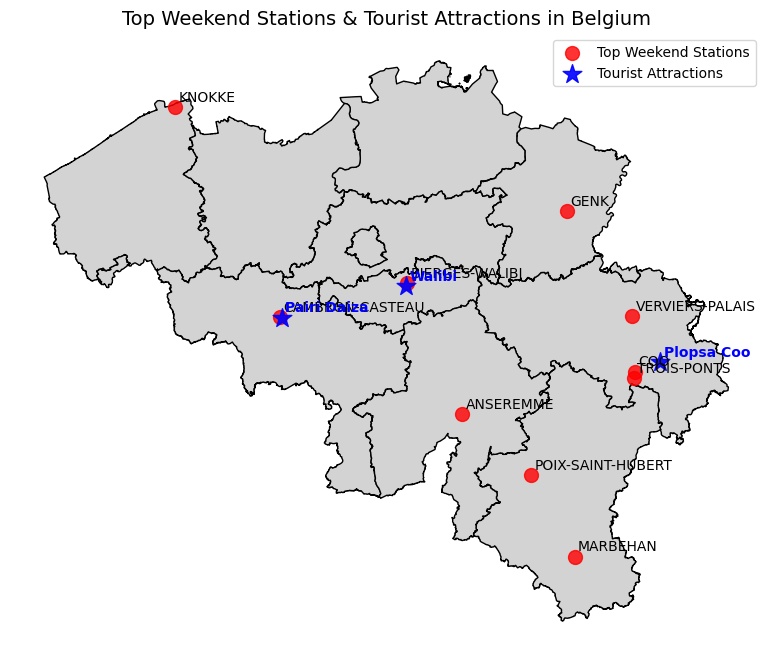

In [70]:
# Your tourist attractions data
data = {'Name': ['Walibi', 'Pairi Daiza', 'Plopsa Coo'],
        'lat': [50.69885, 50.58472, 50.4245],
        'lon': [4.59004, 3.88722, 6.0218]}

attractions_df = pd.DataFrame(data)

# Convert to GeoDataFrame
attractions_gdf = gpd.GeoDataFrame(
    attractions_df,
    geometry=gpd.points_from_xy(attractions_df.lon, attractions_df.lat),
    crs='EPSG:4326'
)

# Load Belgium provinces
provinces_df = gpd.read_file('./BELGIUM_-_Provinces/BELGIUM_-_Provinces.shp').to_crs(epsg=4326)

# Create figure and axes
fig, ax = plt.subplots(1, figsize=(10, 8))

# Plot provinces as background
provinces_df.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot top 10 weekend stations (red points)
gdf_max_10.plot(ax=ax, color='red', markersize=100, alpha=0.8, label='Top Weekend Stations')

# Plot tourist attractions (blue stars)
attractions_gdf.plot(ax=ax, color='blue', marker='*', markersize=200, alpha=0.9, label='Tourist Attractions')

# Add labels for stations
for x, y, label in zip(gdf_max_10.geometry.x, gdf_max_10.geometry.y, gdf_max_10['Station']):
    ax.text(x + 0.02, y + 0.02, label, fontsize=10)

# Add labels for attractions
for x, y, label in zip(attractions_gdf.geometry.x, attractions_gdf.geometry.y, attractions_gdf['Name']):
    ax.text(x + 0.02, y + 0.02, label, fontsize=10, color='blue', fontweight='bold')

# Title and legend
ax.set_title("Top Weekend Stations & Tourist Attractions in Belgium", fontsize=14)
ax.legend()
ax.axis('off')  # optional: hide axes

plt.show()

### Hypothesis1: Stations with more weekend traffic might offer more leisure-oriented facilities.


In [72]:
data_path4 = './Data/facilities.csv'

facilities_df = pd.read_csv(data_path4)

facilities_df

,station_id,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_open_wednesday,sales_close_wednesday,sales_open_thursday,sales_close_thursday,sales_open_friday,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday
0,8734201,Arras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8015345,Aachen Hbf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8895000,Aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,05:45,20:00,05:45,20:00,05:45,20:00,06:00,20:00,06:00,20:00
3,8895125,Aalst-Kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8891140,Aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,07:00,14:15,07:00,14:15,07:00,14:15,07:45,15:00,07:45,15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,8832334,Zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,8895208,Zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,05:45,20:00,05:45,20:00,05:45,20:00,07:15,14:30,07:15,14:30
671,8891611,Zwankendamme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,8894821,Zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
weekend_stations_df

,Station,Avg week,Avg saturday,Avg sunday,Avg weekend,weekend_ratio
13,ANSEREMME,51.0,124.0,45.0,84.5,1.656863
57,BIERGES-WALIBI,146.0,504.0,562.0,533.0,3.650685
100,CAMBRON-CASTEAU,156.0,251.0,146.0,198.5,1.272436
116,COO,35.0,50.0,66.0,58.0,1.657143
194,GENK,888.0,715.0,1422.0,1068.5,1.203266
272,JURBISE,1596.0,1931.0,1726.0,1828.5,1.145677
280,KNOKKE,786.0,778.0,971.0,874.5,1.112595
336,MARBEHAN,555.0,343.0,898.0,620.5,1.118018
417,POIX-SAINT-HUBERT,21.0,30.0,37.0,33.5,1.595238
494,TROIS-PONTS,154.0,113.0,213.0,163.0,1.058442


In [81]:
# Standardize station names
weekend_stations_df['Station'] = weekend_stations_df['Station'].str.strip().str.upper()
facilities_df['name'] = facilities_df['name'].str.strip().str.upper()

# Select only relevant facility columns for leisure/visitor analysis
facility_cols = [
    'station_id', 'name', 'ticket_vending_machine', 'luggage_lockers',
    'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
    'wheelchair_available', 'ramp', 'elevator_platform'
]

facilities_subset = facilities_df[facility_cols]

# Merge
weekend_facilities = pd.merge(
    weekend_stations_df,
    facilities_subset,
    left_on='Station',
    right_on='name',
    how='left'
)

# Drop stations with missing facility info
weekend_facilities = weekend_facilities.dropna(subset=['ticket_vending_machine', 'free_parking'])

C:\Users\Daphne\AppData\Local\Temp\ipykernel_37648\3645129440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_stations_df['Station'] = weekend_stations_df['Station'].str.strip().str.upper()


In [82]:
# Convert Boolean/Yes-No columns to numeric if needed
bool_cols = ['ticket_vending_machine', 'luggage_lockers', 'free_parking', 
             'taxi', 'bicycle_spots', 'blue-bike', 
             'wheelchair_available', 'ramp', 'elevator_platform']

# If values are 'Yes'/'No' or 1/0, make them numeric
for col in bool_cols:
    weekend_facilities[col] = weekend_facilities[col].apply(lambda x: 1 if x in [1, 'Yes', True] else 0)

# Sum to see how many stations have each facility
facility_summary = weekend_facilities[bool_cols].sum().sort_values(ascending=False)
print(facility_summary)

ticket_vending_machine    7
free_parking              7
bicycle_spots             3
ramp                      3
taxi                      2
wheelchair_available      1
blue-bike                 1
elevator_platform         1
luggage_lockers           0
dtype: int64


In [83]:
weekend_facilities[['Station', 'weekend_ratio'] + bool_cols]

,Station,weekend_ratio,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,blue-bike,wheelchair_available,ramp,elevator_platform
0,ANSEREMME,1.656863,1,0,1,0,0,0,0,0,0
1,BIERGES-WALIBI,3.650685,0,0,0,0,0,0,0,0,0
2,CAMBRON-CASTEAU,1.272436,0,0,0,0,0,0,0,0,0
3,COO,1.657143,0,0,1,0,0,0,0,0,0
4,GENK,1.203266,1,0,1,1,1,1,0,1,1
6,KNOKKE,1.112595,1,0,1,1,1,0,1,1,0
7,MARBEHAN,1.118018,1,0,1,0,1,0,0,1,0
8,POIX-SAINT-HUBERT,1.595238,1,0,1,0,0,0,0,0,0
9,TROIS-PONTS,1.058442,1,0,1,0,0,0,0,0,0
10,VERVIERS-PALAIS,2.750000,1,0,0,0,0,0,0,0,0


### Hypothesis2: Stations with more weekend travelers might have fewer subscription holders and more single/return tickets.

## Q4: Cluster stations based on weekday vs. weekend usage. How do these clusters compare to the earlier facilities-based clusters?


## Working upon the travelers vs facilities insights of GetYouStartedPt2